# Random Forest Generator

### How privacy and resemblance scores vary with the probability of changing a value ? 
(The proportion of artifical values)

In [1]:
data_dir = '../../../data'

datasets = {'iris': (data_dir + '/iris', 'iris'),
            'iris_1': (data_dir + '/iris_1', 'iris'),
            'iris_2': (data_dir + '/iris_2', 'iris'),
            'mimic': (data_dir + '/mimic', 'mimic'),
            'mushrooms': (data_dir + '/mushrooms', 'mushrooms'),
            'chems': (data_dir + '/chems', 'chems'),
            'credit': (data_dir + '/credit_data', 'credit'),
            'squares': (data_dir + '/squares', 'squares'),
            'squares_2': (data_dir + '/squares_2', 'squares')}

# Dataset
input_dir, basename = datasets['iris']

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sys import path

# AutoML and Comparator
main_path = '../../../'
path.append(main_path + 'code/auto_ml')
path.append(main_path + 'code/processing')
path.append(main_path + 'code/functions')
path.append(main_path + 'code/models')
path.append(main_path + 'data')
path.append(main_path + 'generators')
%matplotlib inline
%load_ext autoreload
%autoreload 2

from auto_ml import AutoML
from comparator import Comparator

# Generator
from rf_generator import RF_generator

### Train the generator

In [3]:
original_data = AutoML(input_dir, basename)
gen = RF_generator(original_data)
gen.fit()

### Generate data and compute scores

In [4]:
#gen_data = 
gen.generate_to_automl("../../../data", "iris_gen", p=1)

In [ ]:
ps = [] # privacy
rs = [] # resemblance

thresholds = np.arange(0.2, 0.8, 0.1)

for threshold in thresholds:
        
    # Comparator for metric testing
    comparator = Comparator(original_data, AutoML('../../../data', 'iris_gen'))
    comparator.compute_mda(norm='manhattan', precision=0.01, threshold=threshold)

    # TODO class MDA
    (_, _), (privacy1, resemblance1), _ = comparator.mda1
    ps.append(privacy1)
    rs.append(resemblance1)
    #(_, _), (privacy2, resemblance2), _ = comparator.mda2
        
plt.plot(thresholds, ps, label='privacy')
plt.plot(thresholds, rs, label='resemblance')
plt.ylabel('score')
plt.xlabel('threshold')
plt.legend()
plt.show()

In [ ]:
for threshold in [0.1, 0.3, 0.5]:
    x = np.arange(0, 1.1, 0.1)
    ps = [] # privacy
    rs = [] # resemblance
    for p in x:
        # Generation
        folder_name = '../../../data/'+basename+'_rf_'+str(p)
        gen_basename = basename+'_rf'
        ds = gen.generate_to_automl(folder_name, gen_basename, p=p)
        
        # Comparator for metric testing
        comparator = Comparator(AutoML(input_dir, basename), ds)
        comparator.compute_mda(norm='manhattan', precision=0.01, threshold=threshold)
        
        # TODO class MDA
        (_, _), (privacy1, resemblance1), _ = comparator.mda1
        ps.append(privacy1)
        rs.append(resemblance1)
        #(_, _), (privacy2, resemblance2), _ = comparator.mda2
        
    print('Threshold: {}'.format(threshold))
    plt.plot(x, ps, label='privacy')
    plt.plot(x, rs, label='resemblance')
    #plt.plot(x, ps, label='threshold='+str(threshold))
    #plt.plot(x, rs, label='threshold='+str(threshold))
    plt.ylabel('score')
    plt.xlabel('p')
    plt.legend()
    plt.show()

In [ ]:
for threshold in np.arange(0.2, 0.8, 0.1):

    #threshold = 0.4
    #x = np.arange(0, 1.1, 0.1)
    for p in [1]: #x:
        # Generation
        folder_name = '../../../data/'+basename+'_rf_'+str(p)
        gen_basename = basename+'_rf'
        ds = gen.generate_to_automl(folder_name, gen_basename, p=p)

        # Comparator for metric testing
        comparator = Comparator(AutoML(input_dir, basename), ds)
        comparator.compute_mda(norm='manhattan', precision=0.01, threshold=threshold)

        comparator.show_mda()

## COMPARISON OF DIFFERENT METRICS ON MDA

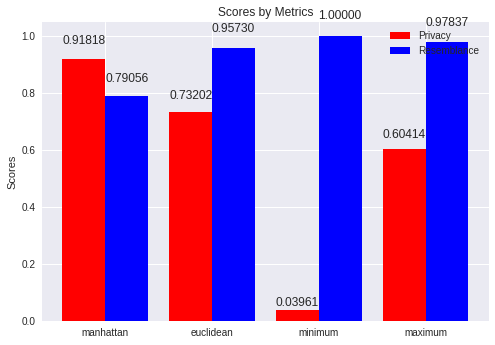

In [8]:
dist_metrics=['manhattan', 'euclidean', 'minimum', 'maximum']
privacy_values=[]
resemblance_values=[]

for metric in dist_metrics:
    comparator = Comparator(original_data, AutoML('../../../data', 'iris_gen'))
    comparator.compute_mda(norm=metric, precision=0.01, threshold=0.4)
    (_, _), (privacy1, resemblance1), _ = comparator.mda1
    privacy_values.append(privacy1)
    resemblance_values.append(resemblance1)

fig, ax = plt.subplots()
ind = np.arange(4)
width = 0.4
privacy_bar = ax.bar(ind, privacy_values, width, color='r')
resemblance_bar = ax.bar(ind+width, resemblance_values, width, color='b')
ax.set_ylabel('Scores')
ax.set_title('Scores by Metrics')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(dist_metrics)
ax.legend((privacy_bar[0], resemblance_bar[0]), ('Privacy', 'Resemblance'))

def autolabel(bars):
    """
    Attach a text label above each bar displaying its height
    """
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1.05*height,
                '%.5f' % float(height),
                ha='center', va='bottom')

autolabel(privacy_bar)
autolabel(resemblance_bar)


In [ ]:
# Other comparator functions

#comparator.show_descriptors()
#comparator.show_comparison_matrix()

#comparator.show_classifier_score()

#from sklearn.ensemble import RandomForestClassifier
#comparator.show_classifier_score(clf=RandomForestClassifier(n_estimators=200))